# Assignment 5 Machine Learning

NIM              : 2602063913

NAME             : Bernardus Ignasio

CLASS            : LA01

Assignment Number: 5

In [378]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, adjusted_rand_score,davies_bouldin_score

In [379]:
dataset=pd.read_csv('https://raw.githubusercontent.com/joh4nnes/MLData/main/winequality-red.csv')
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [403]:
dataset.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

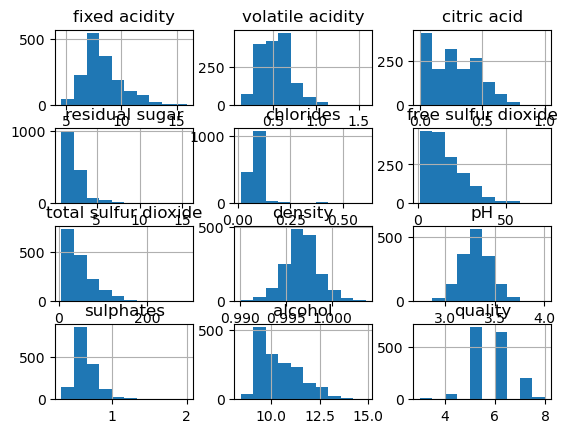

In [404]:
dataset.hist()

#### Extracting matrix of features

In [381]:
x=dataset.iloc[:,:11].values
x


array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [382]:
from sklearn.preprocessing import StandardScaler

scale=StandardScaler()
x=scale.fit_transform(x)
x

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

#### Find Optimal number of cluster with dendogram

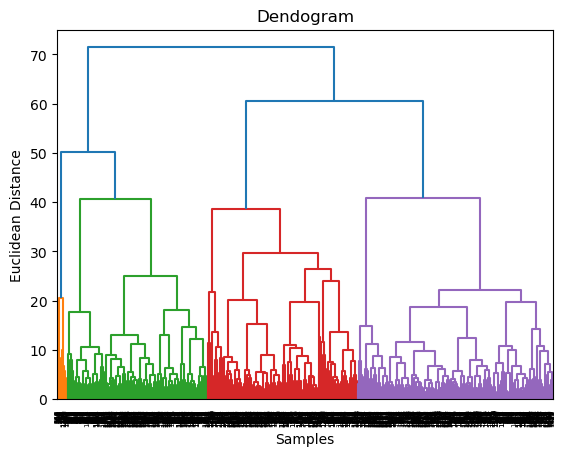

In [383]:
import scipy.cluster.hierarchy as shc
dendro=shc.dendrogram(shc.linkage(x,method='ward'))
plt.title('Dendogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.show()


by slicing horizontally, optimal number of cluster is between 3 and 4

#### Clustering Dataset with agglomerative clustering and optimal cluster

In [384]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')
y_predict=hc.fit_predict(x)
y_predict

C:\Users\Ignas\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 0, ..., 2, 2, 1], dtype=int64)

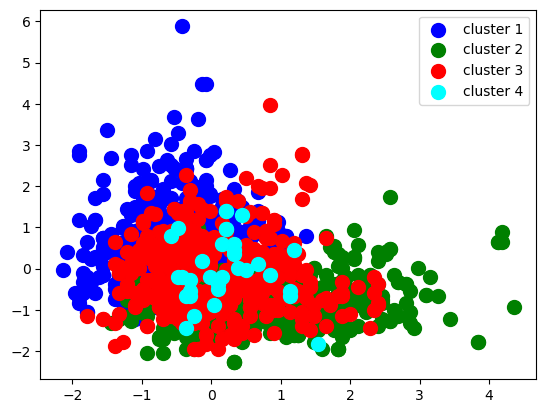

In [385]:
plt.scatter(x[y_predict==0,0],x[y_predict==0,1], s=100,c='blue',label='cluster 1')
plt.scatter(x[y_predict==1,0],x[y_predict==1,1], s=100,c='green',label='cluster 2')
plt.scatter(x[y_predict==2,0],x[y_predict==2,1], s=100,c='red',label='cluster 3')
plt.scatter(x[y_predict==3,0],x[y_predict==3,1], s=100,c='cyan',label='cluster 4')
#plt.scatter(x[y_predict==4,0],x[y_predict==4,1], s=100,c='magenta',label='cluster 5')

plt.legend()
plt.show()

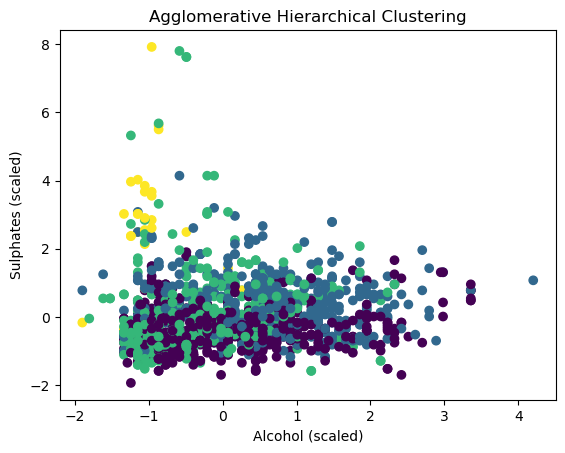

In [386]:
plt.scatter(x[:,10], x[:,9], c=y_predict,cmap='viridis',marker='o')
plt.title('Agglomerative Hierarchical Clustering')
plt.xlabel('Alcohol (scaled)')
plt.ylabel('Sulphates (scaled)')
plt.show()

In [387]:
print(f"Silhouette Score: {silhouette_score(x,hc.labels_,metric='euclidean')}")
print(f"Davies Bouldin Index (DBI): {davies_bouldin_score(x,hc.labels_)}")


Silhouette Score: 0.17141826625204853
Davies Bouldin Index (DBI): 1.6648528437215329


from the visualization and evaluation metrics, we can see that the clustering is still poorly matched and the distance between every cluster cannot be seen, clusters are spreading and combining together which indicates poor clustering quality

#### Enhancing quality with PCA

In [388]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
x=pca.fit_transform(x)
x

array([[-1.61952988,  0.45095009],
       [-0.79916993,  1.85655306],
       [-0.74847909,  0.88203886],
       ...,
       [-1.45612897,  0.31174559],
       [-2.27051793,  0.97979111],
       [-0.42697475, -0.53669021]])

In [389]:
hc=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')
y_predict=hc.fit_predict(x)
y_predict

C:\Users\Ignas\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([2, 0, 0, ..., 2, 2, 3], dtype=int64)

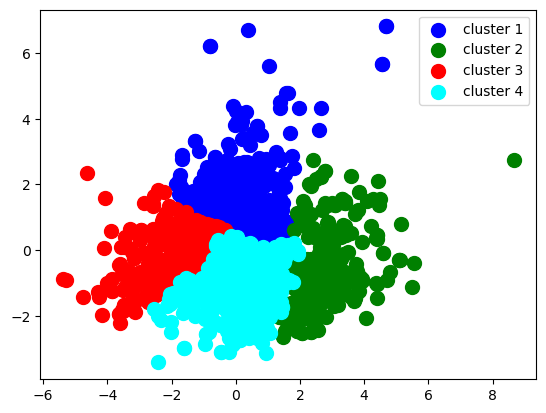

In [390]:
plt.scatter(x[y_predict==0,0],x[y_predict==0,1], s=100,c='blue',label='cluster 1')
plt.scatter(x[y_predict==1,0],x[y_predict==1,1], s=100,c='green',label='cluster 2')
plt.scatter(x[y_predict==2,0],x[y_predict==2,1], s=100,c='red',label='cluster 3')
plt.scatter(x[y_predict==3,0],x[y_predict==3,1], s=100,c='cyan',label='cluster 4')
#plt.scatter(x[y_predict==4,0],x[y_predict==4,1], s=100,c='magenta',label='cluster 5')

plt.legend()
plt.show()

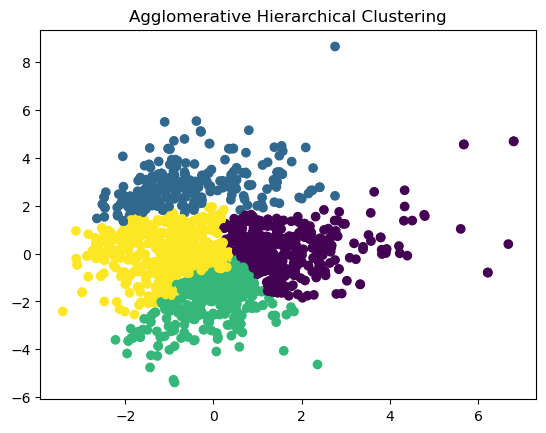

In [391]:
plt.scatter(x[:,1], x[:,0], c=y_predict,cmap='viridis',marker='o')
plt.title('Agglomerative Hierarchical Clustering')
plt.show()

In [392]:
print(f"Silhouette Score: {silhouette_score(x,hc.labels_,metric='euclidean')}")
print(f"Davies Bouldin Index (DBI): {davies_bouldin_score(x,hc.labels_)}")


Silhouette Score: 0.3413983711219637
Davies Bouldin Index (DBI): 0.9068520999649691


after implementing pca and reducting columns until 2 columns left, we can see that the clusters separation can be seen clearly although there's no gap/distance betweeen the clusters. also the evaluation metrics is better, indicating that the clustering is improving